# Assignment: Trees
Do three questions.

In [1]:
! git clone https://github.com/ds4e/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 101 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (26/26), done.


**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

A tree is constructed by recursively splitting the training data based on different features. The splits are chosen such that the target (outcome) variable within each group is as homogeneous as possible, while the differences in outcomes between groups are maximized. This process continues until a stopping criterion is met, such as reaching a predefined maximum depth or a minimum number of samples in a leaf.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Unlike linear models, decision trees handle non-linear relationships between variables well because they do not assume linear relationships between variables when being constructed. Linear models assume a linear relationship between variables and thus are not good at capturing and handling non-linear relationships.

3. Why is the Gini a good loss function for categorical target variables?

The Gini index is a good loss function for categorical target variables because it is lowest when each group is most homogeneous (i.e., the split effectively separates the classes) and highest when each group is more mixed (i.e., the split is not effective). It works as a loss function because minimizing the Gini impurity with each split is an effective way to create the most "pure" groups.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because they can split off until there is one value per leaf. This tendency can be constrained by limiting the maximum depth of the tree model, establishing a minimum number of samples per leaf, or constraining the minimum impurity.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False. Trees perform well with both categorical and numerical variables. It is true that trees perform well with categorical variables because they can use a particular category value to create a split. Similarly, though, trees can use a particular threshold as a splitting point for a numerical continuous variable. Thus, both types of variables work well as features for trees.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Keeping the splitting binary (two branches) is best for computational efficiency, simplicity, and interpretability. Additionally, increasing the number of branches (past 2) after a split usually doesn't significantly improve the performance of a tree model and usually complicates things.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Over-fitting is occuring if the tree has high accuracy on the training set but not the test set. Other signs of over-fitting are if there are very few samples per leaf, the tree is very deep (high depth), and/or the tree is very complex (i.e. small splits, very specific conditions). Under-fitting occurs when the tree is not effectively capturing some patterns in the data. Signs of this include shallow tree depth, poor accuracy on training and testing data, and a small number of leaves.  

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/trees/assignment/data/cars_hw.csv') # Load data
print(df.shape)
print(df.columns)
df.head()

(976, 12)
Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


976 observations. There are 12 columns, but 11 variables that contain relevant data: 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [3]:
from sklearn.model_selection import train_test_split
df_encoded = pd.get_dummies(df[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], dtype='int')

X = pd.concat([df[['Mileage_Run', 'Make_Year', 'Seating_Capacity']], df_encoded], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

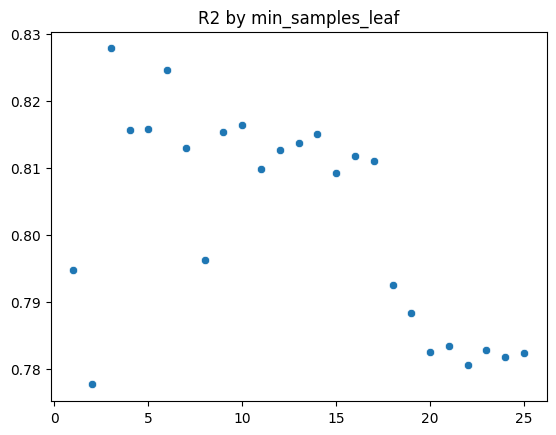

3 achieves the highest R2 value of: 0.8278518695153637


In [4]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier

r2 = []
for i in range(1,26):
  cart = DecisionTreeRegressor(min_samples_leaf = i) # Create a regression object
  cart = cart.fit(X_train, y_train) # Fit the regression
  y_hat = cart.predict(X_test)
  e = y_test - y_hat
  r2.append(1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2))

sns.scatterplot(x=range(1,26), y=r2).set(title='R2 by min_samples_leaf')
plt.show()

max_index = r2.index(max(r2))
print((max_index+1), "achieves the highest R2 value of:", r2[max_index])

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

R2 value: 0.826113796473573
RMSE value: 149152.18831038912


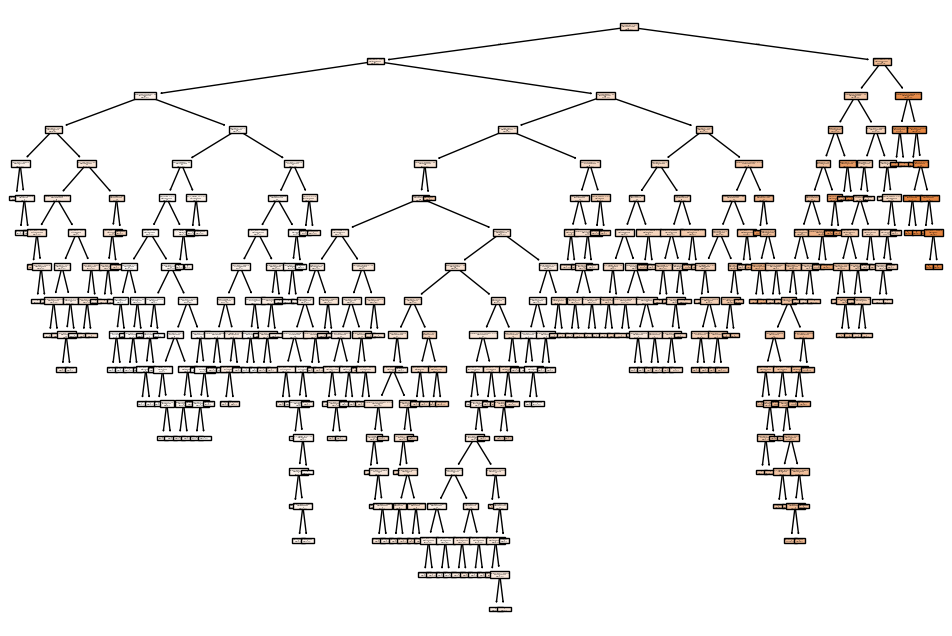

In [5]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier

cart = DecisionTreeRegressor(min_samples_leaf = 3) # Create a regression object
cart = cart.fit(X_train, y_train) # Fit the regression
y_hat = cart.predict(X_test)
e = y_test - y_hat

print("R2 value:", (1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2)))
print("RMSE value:", np.sqrt(np.mean(e**2)))

var_names = cart.feature_names_in_
plt.figure(figsize=(12, 8))
plot_tree(cart, filled=True, feature_names=var_names, class_names=None, label='none')
plt.show()

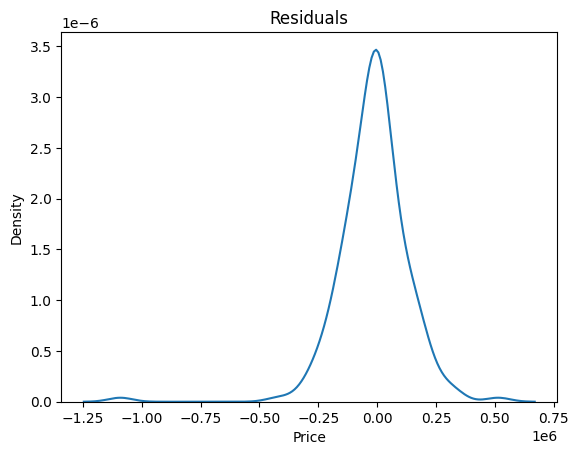

In [6]:
# Plot residuals
sns.kdeplot(e).set(title='Residuals')
plt.show()

The residuals are centered around 0 but not completely symmetric.

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print("R squared:",reg.score(X_test, y_test)) # R squared measure on test set

# Compute RMSE
y_test_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

R squared: 0.8421688860523253
RMSE: 141961.41067406957


The linear regression and regression tree models perform very similarly, with the linear regression model performing slightly better (higher R squared value, lower RMSE value). This could be because the features have a linear relationship with the output variable, price.

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

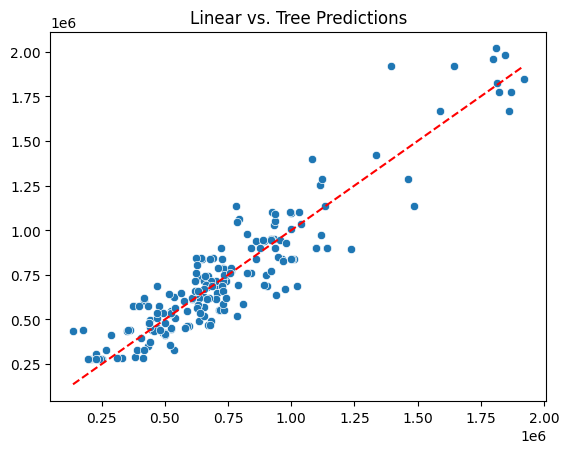

In [8]:
linear_predict = reg.predict(X_test)
tree_predict = cart.predict(X_test)

sns.scatterplot(x=linear_predict, y=tree_predict).set(title='Linear vs. Tree Predictions')
plt.plot([min(linear_predict), max(linear_predict)], [min(linear_predict), max(linear_predict)], color='red', linestyle='--')
plt.show()

The red dashed line represents the y=x line, illustrating that the predictions from the linear regression and regression tree models are quite similar to each other.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/trees/assignment/data/Breast Cancer METABRIC.csv') # Load data
print(df.shape)
print(df.columns)
df.head()

(2509, 34)
Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


There are 2509 observations and 34 variables in the dataset.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [23]:
numerical_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_encoded = pd.get_dummies(df[categorical_vars], dtype='int')

df_model = pd.concat([df[numerical_vars], df_encoded, df['Overall Survival Status']], axis=1)
print(df_model.shape)
df_model = df_model.dropna()
print(df_model.shape)

(2509, 15)
(1400, 15)


In [24]:
X = df_model.drop('Overall Survival Status', axis=1)

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

y = df_model['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes


cart = DecisionTreeClassifier(min_samples_leaf=10) # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

In [35]:
## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.625 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,112,46
Living,59,63


4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
$$ TPR = \dfrac{TP}{TP+FN}$$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$

    Does your model tend to perform better with respect to one of these metrics?

In [36]:
print(tab.index)
print(tab.columns)

Index(['Deceased', 'Living'], dtype='object', name='Overall Survival Status')
Index(['Deceased', 'Living'], dtype='object', name='col_0')


In [37]:
TP = tab.loc['Living', 'Living']
TN = tab.loc['Deceased', 'Deceased']
FP = tab.loc['Deceased', 'Living']
FN = tab.loc['Living', 'Deceased']

TNR = TN/(TN+FP)
TPR = TP/(TP+FN)

print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)

True Positive Rate: 0.5163934426229508
True Negative Rate: 0.7088607594936709


Yes, the model seems to perform better at predicting the deceased outcome.

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [44]:
numerical_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_encoded = pd.get_dummies(df[categorical_vars], dtype='int')

df_model = pd.concat([df[numerical_vars], df_encoded, df['Overall Survival (Months)']], axis=1)
print(df_model.shape)
df_model = df_model.dropna()
print(df_model.shape)

#df_model.columns
X = df_model.drop('Overall Survival (Months)', axis=1)
y = df_model['Overall Survival (Months)']

(2509, 15)
(1400, 15)


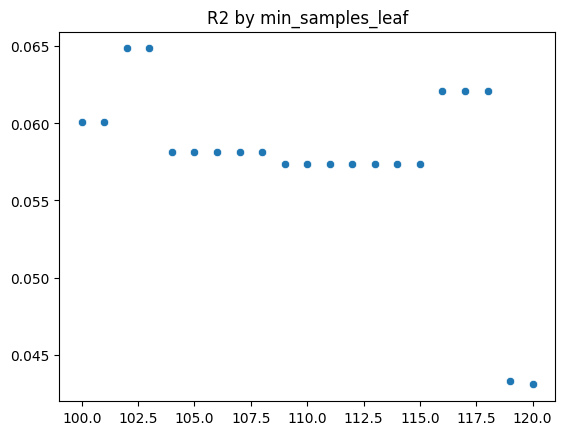

Best min_sample_leaf value = 103 with an R2 value of: 0.06485908406744234


In [47]:
from sklearn.tree import DecisionTreeRegressor # Import the tree classifier
from sklearn.tree import plot_tree # Import the tree classifier
from sklearn.model_selection import train_test_split # Train/test splitter

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes


r2 = []
# Find optimal min_samples_leaf value
for i in range(100, 121):
  cart = DecisionTreeRegressor(min_samples_leaf = i) # Create a regression object
  cart = cart.fit(X_train, y_train) # Fit the regression
  y_hat = cart.predict(X_test)
  e = y_test - y_hat
  r2.append(1-np.sum(e**2)/np.sum( (y_test - np.mean(y_train))**2))

sns.scatterplot(x=range(100, 121), y=r2).set(title='R2 by min_samples_leaf')
plt.show()

max_index = r2.index(max(r2))
print("Best min_sample_leaf value =", (max_index+100), "with an R2 value of:", r2[max_index])

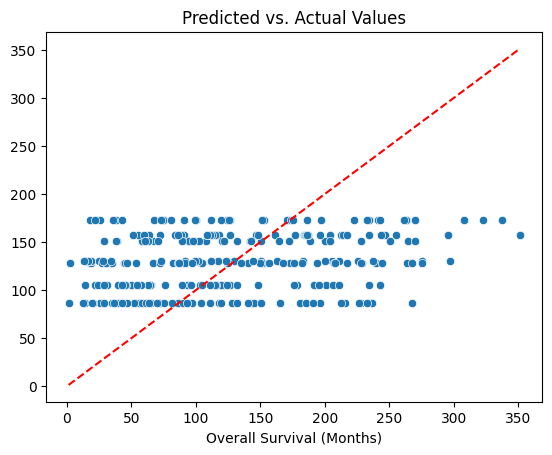

In [48]:
sns.scatterplot(x=y_test, y=y_hat).set(title='Predicted vs. Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

The predicted values by the model and actual values do not line up very well, as indicated by the above plot and very low R squared value. I do not feel comfortable using this model for clinical purposes.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?